In [1]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.simplefilter("ignore")


In [2]:
data = pd.read_csv(r"C:AWS-Dataset.csv")

In [3]:
data.head(5)

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K,Status
0,54,22,70,21,19.52,2.13,55.04,6.30,101.50,6.502985,202.935536,90.0,42.0,43.0,ON
1,12,20,40,104,19.49,2.01,55.17,10.46,101.50,7.038096,226.655537,85.0,58.0,41.0,OFF
2,34,26,35,62,19.47,1.90,55.30,14.63,101.51,7.840207,263.964248,60.0,55.0,44.0,ON
3,7,44,44,93,19.54,2.28,54.20,16.08,101.51,6.980401,242.864034,74.0,35.0,40.0,OFF
4,50,38,23,92,19.61,2.66,53.09,17.52,101.51,7.628473,262.717340,78.0,42.0,42.0,OFF


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Soil Moisture        100000 non-null  int64  
 1   Temperature          100000 non-null  int64  
 2    Soil Humidity       100000 non-null  int64  
 3   Time                 100000 non-null  int64  
 4   Air temperature (C)  23995 non-null   float64
 5   Wind speed (Km/h)    23995 non-null   float64
 6   Air humidity (%)     23995 non-null   float64
 7   Wind gust (Km/h)     23995 non-null   float64
 8   Pressure (KPa)       23995 non-null   float64
 9   ph                   2200 non-null    float64
 10  rainfall             2200 non-null    float64
 11  N                    2200 non-null    float64
 12  P                    2200 non-null    float64
 13  K                    2200 non-null    float64
 14  Status               100000 non-null  object 
dtypes: float64(10), in

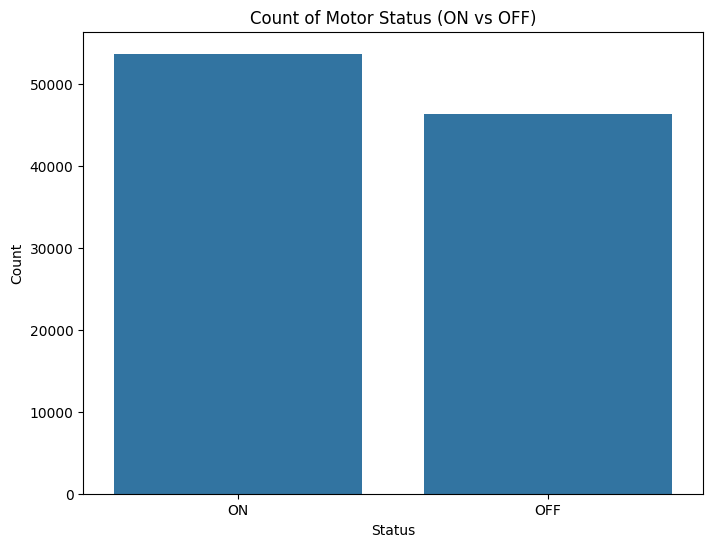

In [5]:
# CountPlot for TargetAttribute(Motor ON and OFF) 
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=data)
plt.title('Count of Motor Status (ON vs OFF)')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

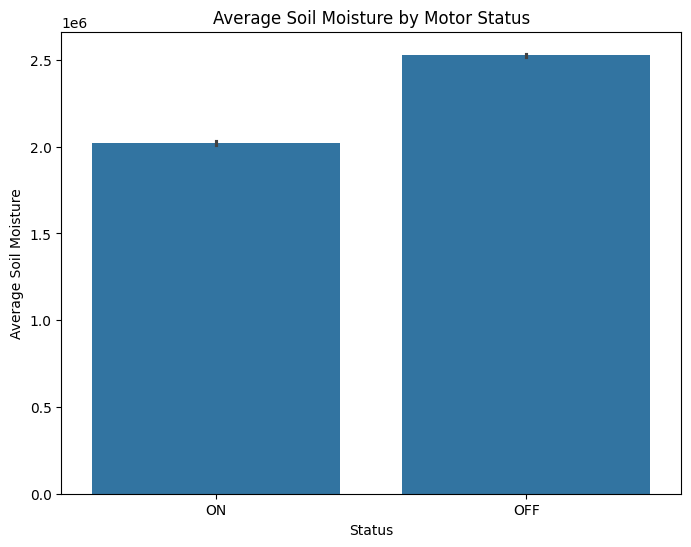

In [6]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Status', y='Soil Moisture', data=data, estimator=sum)  # Use estimator to summarize values
plt.title('Average Soil Moisture by Motor Status')
plt.xlabel('Status')
plt.ylabel('Average Soil Moisture')
plt.show()

Text(0, 0.5, 'Average Temperature')

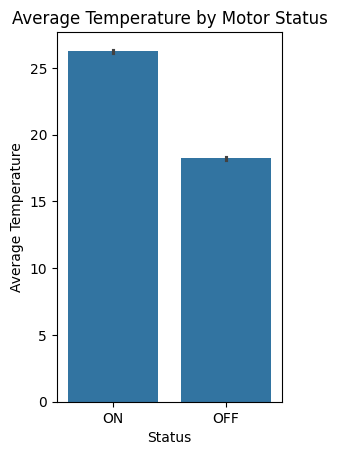

In [7]:
# Bar plot for Temperature and Status
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x='Status', y='Temperature', data=data, estimator='mean')
plt.title('Average Temperature by Motor Status')
plt.xlabel('Status')
plt.ylabel('Average Temperature')

Text(0, 0.5, 'Average Air Humidity (%)')

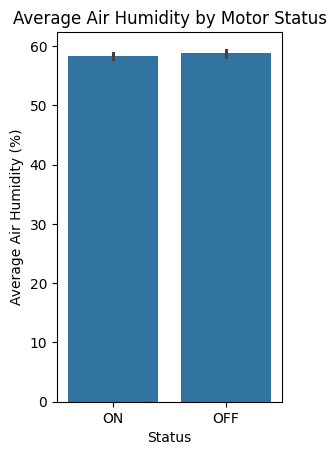

In [8]:
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x='Status', y='Air humidity (%)', data=data, estimator='mean')
plt.title('Average Air Humidity by Motor Status')
plt.xlabel('Status')
plt.ylabel('Average Air Humidity (%)')

In [9]:
df = pd.read_csv(r"C:\Users\dwara\Downloads\TARP\FINALL\synthetic_soil_data.csv")
df

,Soil Moisture,Temperature,Air Humidity (%),Status
0,85.28,37.52,60.56,ON
1,58.00,28.98,71.83,ON
2,69.57,35.96,59.78,ON
3,94.82,41.53,60.77,ON
4,87.35,41.04,46.68,ON
...,...,...,...,...
1995,51.96,29.58,55.60,ON
1996,78.03,41.97,56.58,ON
1997,53.17,30.89,58.78,ON
1998,27.16,26.30,66.19,OFF


In [18]:
cols = ["Soil Moisture","Air humidity (%)","Temperature","Status"]
df = data[cols]
df

,Soil Moisture,Air humidity (%),Temperature,Status
0,54,55.04,22,ON
1,12,55.17,20,OFF
2,34,55.30,26,ON
3,7,54.20,44,OFF
4,50,53.09,38,OFF
...,...,...,...,...
99995,74,NaN,3,OFF
99996,58,NaN,10,OFF
99997,4,NaN,35,ON
99998,83,NaN,36,OFF


In [11]:
df.isnull().sum()

Soil Moisture           0
Air humidity (%)    76005
Temperature             0
Status                  0
dtype: int64

In [29]:
df = df.dropna()
df.isnull().sum()

Soil Moisture       0
Air humidity (%)    0
Temperature         0
Status              0
dtype: int64

In [30]:
df

,Soil Moisture,Air humidity (%),Temperature,Status
0,54,55.04,22,ON
1,12,55.17,20,OFF
2,34,55.30,26,ON
3,7,54.20,44,OFF
4,50,53.09,38,OFF
...,...,...,...,...
26296,77,96.00,30,OFF
26297,33,96.00,35,ON
26298,88,96.00,2,OFF
26299,61,96.00,45,OFF


In [31]:
df.describe()

,Soil Moisture,Air humidity (%),Temperature
count,23995.000000,23995.000000,23995.000000
mean,45.433090,58.521052,22.492228
std,26.007715,30.073448,13.282993
min,1.000000,0.590000,0.000000
25%,23.000000,33.980000,11.000000
50%,45.000000,61.310000,23.000000
75%,68.000000,86.360000,34.000000
max,90.000000,96.000000,45.000000


In [32]:
X = df[['Soil Moisture', 'Air humidity (%)', 'Temperature']]
y = df['Status']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Random forest

In [34]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.6738903938320483
              precision    recall  f1-score   support

         OFF       0.64      0.63      0.64      2173
          ON       0.70      0.71      0.71      2626

    accuracy                           0.67      4799
   macro avg       0.67      0.67      0.67      4799
weighted avg       0.67      0.67      0.67      4799



In [36]:
new_data = pd.DataFrame({
    'Soil Moisture': [100],  # Replace with your actual input values
    'Air humidity (%)': [98],    # Replace with your actual input values
    'Temperature': [25]      # Replace with your actual input values
})

# Make predictions
predictions = rf_model.predict(new_data)

# Output the predicted status
print("Predicted Status:", predictions[0])

Predicted Status: OFF


In [37]:
new_data = np.array([[0, 94, 24]])  # Input values as a 2D array

# Make predictions
predictions = rf_model.predict(new_data)
predictions

array(['ON'], dtype=object)

### Logistic regression

In [38]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_predictions = log_model.predict(X_test)
y_pred_lr = log_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_predictions))

Accuracy: 0.6980620962700562
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         OFF       0.68      0.64      0.66      2173
          ON       0.71      0.75      0.73      2626

    accuracy                           0.70      4799
   macro avg       0.70      0.69      0.69      4799
weighted avg       0.70      0.70      0.70      4799



### Support vector classifier

In [39]:
# Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)
y_pred_svc = svc_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Support Vector Classifier Classification Report:")
print(classification_report(y_test, svc_predictions))

Accuracy: 0.7009793707022296
Support Vector Classifier Classification Report:
              precision    recall  f1-score   support

         OFF       0.69      0.62      0.65      2173
          ON       0.71      0.77      0.74      2626

    accuracy                           0.70      4799
   macro avg       0.70      0.69      0.70      4799
weighted avg       0.70      0.70      0.70      4799



In [40]:
new_data = [[100,  98,  29.3]]
predictions = rf_model.predict(new_data)
status = predictions[0]  # Assuming 1 = "on" and 0 = "off"
                
# Output the predicted status
print("Predicted Status:", status)

Predicted Status: OFF


# WITH PUMP

In [49]:
import serial
import time
import numpy as np

# Connect to the Arduino
arduino = serial.Serial('COM5', 9600, timeout=1)
time.sleep(2)  # Wait for the connection to establish

# Function to read data from Arduino
def read_data():
    while True:
        line = arduino.readline().decode('utf-8').strip()  # Read a line from the Arduino
        if line:  # If there's something to read
            print(line)
            # Split the line into soil moisture, humidity, and temperature values
            values = line.split(',')
            if len(values) == 3:  # Ensure there are exactly 3 values
                soil_moisture, humidity, temperature = map(float, values)
                
                # Prepare the input data for prediction (make sure you have your Random Forest model loaded)
                new_data = np.array([[soil_moisture, humidity, temperature]])
                
                # Predict if watering is needed
                predictions = rf_model.predict(new_data)
                status = predictions[0]  # Assuming 1 = "on" and 0 = "off"
                
                # Output the predicted status
                print("Current Status:", status)

                # Send the command to Arduino based on the status
                if status == "OFF":  # "on" for watering
                    arduino.write(b'0')  # Turn on pump (send '1' to Arduino)
                    print("Turning ON Water pump")
                else:  # "off" for no watering
                    arduino.write(b'1')  # Turn off pump (send '0' to Arduino)
                    print("Turning OFF Water pump")
        
        time.sleep(3)  # Adjust delay as needed

try:
    read_data()
except KeyboardInterrupt:
    print("Exiting...")
finally:
    arduino.close()


0.59,95.00,28.50
Current Status: ON
Turning OFF Water pump
1.56,95.00,28.50
Current Status: ON
Turning OFF Water pump
.
1.86,95.00,28.50
Current Status: ON
Turning OFF Water pump
.
27.27,95.00,28.50
Current Status: ON
Turning OFF Water pump
.
29.72,95.00,28.50
Current Status: ON
Turning OFF Water pump
.
43.11,95.00,28.50
Current Status: ON
Turning OFF Water pump
.
31.87,95.00,28.50
Current Status: ON
Turning OFF Water pump
0.59,95.00,28.50
Current Status: ON
Turning OFF Water pump
.
0.49,95.00,28.50
Current Status: ON
Turning OFF Water pump
.
0.59,95.00,28.50
Current Status: ON
Turning OFF Water pump
.
0.59,95.00,28.50
Current Status: ON
Turning OFF Water pump
.
0.68,95.00,28.50
Current Status: ON
Turning OFF Water pump
.
0.59,95.00,28.50
Current Status: ON
Turning OFF Water pump
.
0.59,95.00,28.50
Current Status: ON
Turning OFF Water pump
.
0.59,95.00,28.50
Current Status: ON
Turning OFF Water pump
.
0.59,95.00,28.50
Current Status: ON
Turning OFF Water pump
53.27,95.00,28.50
Current 

Rnadom forest

In [23]:
import serial
import time

arduino = serial.Serial('COM3', 9600, timeout=1)
time.sleep(2)  # Wait for the connection to establish

def read_data():
    while True:
        line = arduino.readline().decode('utf-8').strip()  # Read a line from the Arduino
        if line:  # If there's something to read
            print(line)
            # Here you can add code to store the data as needed
            # e.g., save to a file or database
        values = line.split(',')
        if len(values) == 3:  # Ensure there are exactly 3 values
            soil_moisture, humidity, temperature = map(float, values)
            
        new_data = np.array([[soil_moisture, humidity, temperature]])
        
        predictions = rf_model.predict(new_data)
                    
                    # Output the predicted status
        print("Predicted Status:", predictions[0])
        time.sleep(7)

try:
    read_data()
except KeyboardInterrupt:
    print("Exiting...")
finally:
    arduino.close()


-0.00,95.00,29.30
Predicted Status: ON


C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.10,95.00,28.90
Predicted Status: ON


C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.10,93.00,28.90
Predicted Status: ON


C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted Status: ON
0.10,93.00,28.90
Predicted Status: ON


C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.10,93.00,28.90
Predicted Status: ON


C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.10,93.00,28.90
Predicted Status: ON


C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.10,93.00,28.90
Predicted Status: ON


C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Exiting...


svm

In [31]:
import serial
import time

arduino = serial.Serial('COM3', 9600, timeout=1)
time.sleep(2)  # Wait for the connection to establish

def read_data():
    while True:
        line = arduino.readline().decode('utf-8').strip()  # Read a line from the Arduino
        if line:  # If there's something to read
            print(line)
        values = line.split(',')
        if len(values) == 3:  # Ensure there are exactly 3 values
            soil_moisture, humidity, temperature = map(float, values)
            
        new_data = np.array([[soil_moisture, humidity, temperature]])
        
        predictions = svc_model.predict(new_data)
                    
                    # Output the predicted status
        print("Predicted Status:", predictions[0])
        time.sleep(7)

try:
    read_data()
except KeyboardInterrupt:
    print("Exiting...")
finally:
    arduino.close()


0.98,82.00,34.70
Predicted Status: ON


C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.20,82.00,34.70
Predicted Status: ON


C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Predicted Status: ON
0.20,82.00,34.70
Predicted Status: ON


C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.20,81.00,34.70
Predicted Status: ON


C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.29,81.00,34.50
Predicted Status: ON


C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.20,81.00,34.20
Predicted Status: ON


C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.29,81.00,34.20
Predicted Status: ON


C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.20,81.00,34.20
Predicted Status: ON


C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


99.61,81.00,34.20
Predicted Status: OFF


C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


99.61,81.00,34.20
Predicted Status: OFF


C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Predicted Status: OFF
99.41,81.00,34.20
Predicted Status: OFF


C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.29,81.00,34.20
Predicted Status: ON


C:\Users\Radcoflex-Purchase\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Exiting...
